In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.shape

(43152, 11)

In [5]:
test.shape

(10788, 10)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no missing data

In [8]:
train = train.drop(train[train["x"]==0].index)
train = train.drop(train[train["y"]==0].index)
train = train.drop(train[train["z"]==0].index)
train.shape

(43135, 11)

In [9]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,21577.642796,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,12456.553482,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10789.500000,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,21578.000000,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,32364.500000,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


All data seems good

# Data Visualization

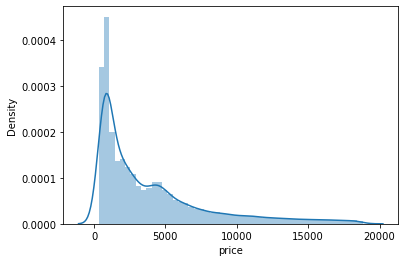

In [10]:
sns.distplot(train["price"])
plt.show()

The distribution shows that price is skewed to the right since mean > median

In [11]:
# using Log to normalize price
train["price"]=np.log(train["price"])

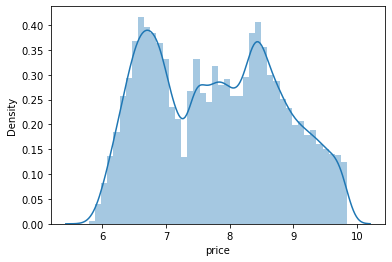

In [12]:
sns.distplot(train["price"])
plt.show()

<AxesSubplot:xlabel='carat', ylabel='Density'>

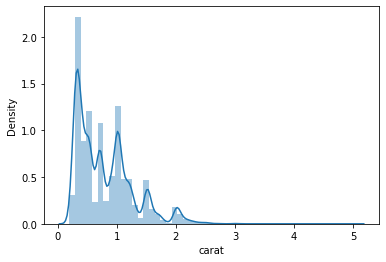

In [13]:
# carat column
sns.distplot(train["carat"])

carat is skwed to the right 

In [14]:
# using Log to normalize carat
train["carat"]=np.log(train["carat"])

<AxesSubplot:xlabel='carat', ylabel='Density'>

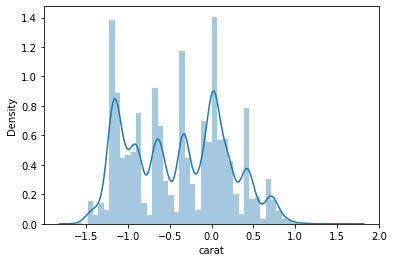

In [15]:
sns.distplot(train["carat"])

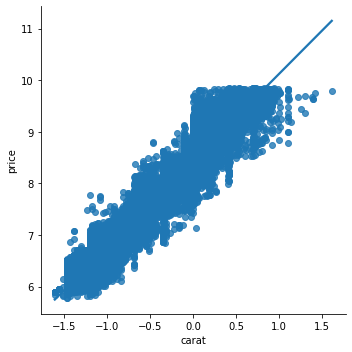

In [16]:
sns.lmplot(x="carat",y="price",data=train)

The graph shows that there is strong relationship between carat and price

In [17]:
train.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

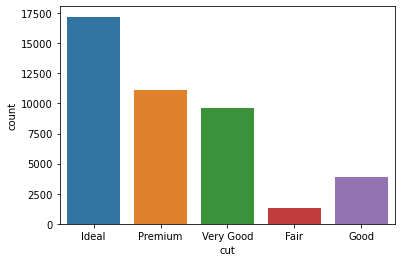

In [18]:
# cut column
sns.countplot(x="cut",data=train)
plt.show()

The graph shows that Ideal has maximum count values, and Fair has the lowest count

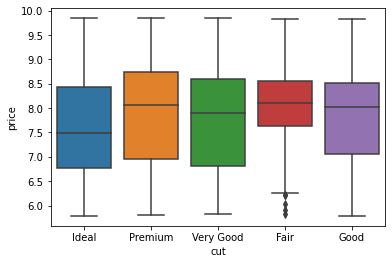

In [19]:
# cut column with the target
sns.boxplot(x="cut",y="price",data=train)
plt.show()

There is no relationship between cut and price, and median price is around 8.5

In [20]:
train.color.unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

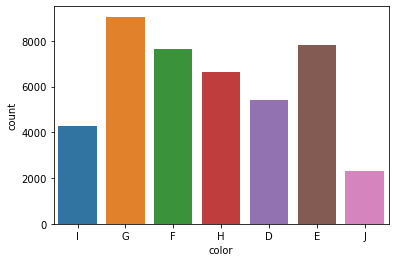

In [21]:
# color column 
sns.countplot(x="color",data=train)
plt.show()

The graph shows that G color has maximum count values, and J color has the lowest count

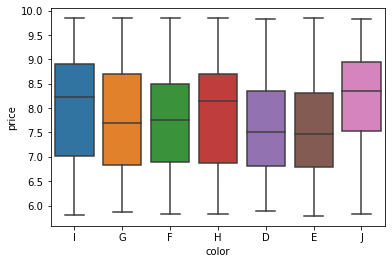

In [22]:
# color column with the target
sns.boxplot(x="color",y="price",data=train)
plt.show()

There is no relationship between color and price, and median price is around 8.5

In [23]:
train.clarity.unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

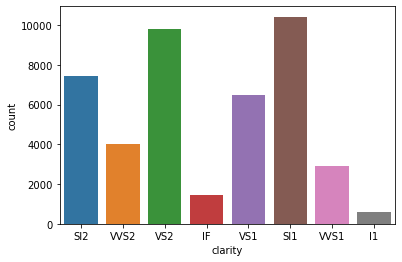

In [24]:
#clarity column
sns.countplot(x="clarity",data=train)
plt.show()

The graph shows that S1  has maximum count values, and IF,I1 and have the lowest count

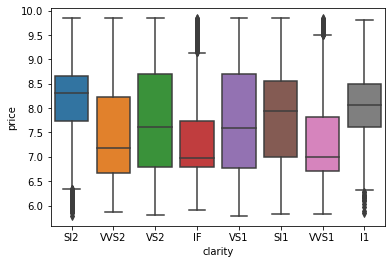

In [25]:
#clarity column with the target
sns.boxplot(x="clarity",y="price",data=train)
plt.show()

IF,WS1 have the lowest median price, and median price is around 8.0

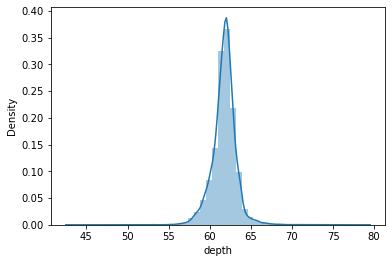

In [26]:
#depth column
sns.distplot(train["depth"])
plt.show()

The graph shows depth is normally distribution with mean of 61.8, and also it shows an outliers

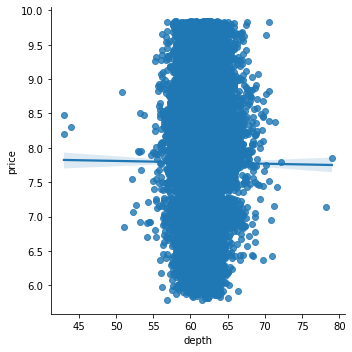

In [27]:
#depth column with target
sns.lmplot(x="depth",y="price",data=train)
plt.show()

There is no relationship between depth and price

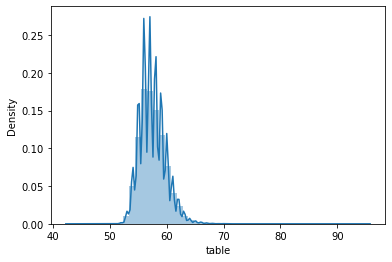

In [28]:
# table column
sns.distplot(train["table"])
plt.show()

The graph shows table is normally distribution with mean of 57.5, and also it shows an outliers

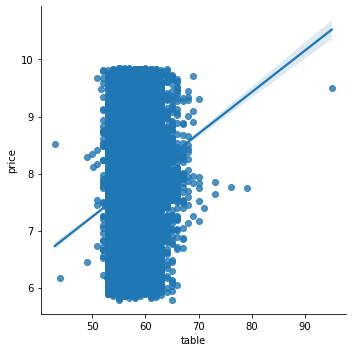

In [29]:
# table column with target
sns.lmplot(x="table",y="price",data=train)
plt.show()

The graph shows a linear relationship between table and price

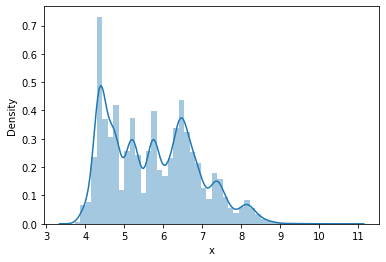

In [30]:
#x column 
sns.distplot(train["x"])
plt.show()

Graph shows that x column has outliers

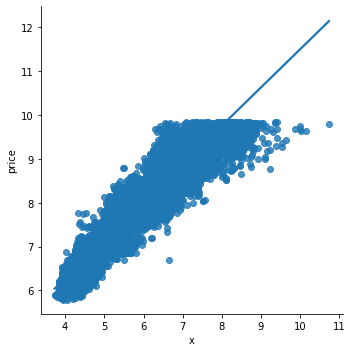

In [31]:
#x column with target
sns.lmplot(x="x",y="price",data=train)
plt.show()

The graph shows a linear relationship between x and price

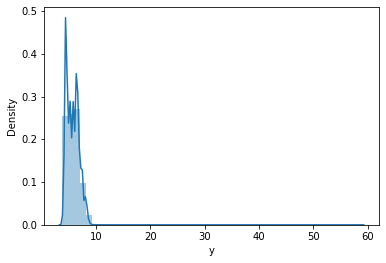

In [32]:
#y column 
sns.distplot(train["y"])
plt.show()

Graph shows that y column has outliers

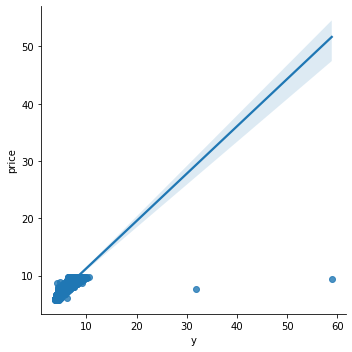

In [33]:
#y column with target
sns.lmplot(x="y",y="price",data=train)
plt.show()

The graph shows a linear relationship between y and price

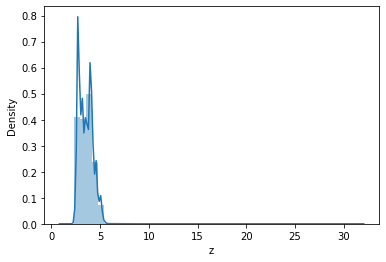

In [34]:
#z column 
sns.distplot(train["z"])
plt.show()

Graph shows that z column has outliers

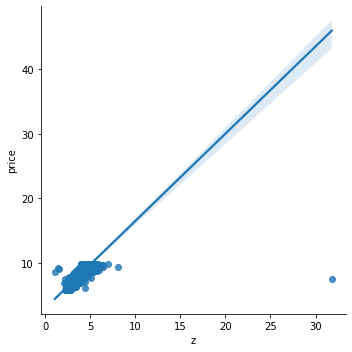

In [35]:
#z column with target
sns.lmplot(x="z",y="price",data=train)
plt.show()

The graph shows a linear relationship between z and price

# Dropping The Outliers

In [36]:
#Dropping the outliers. 
train = train[(train["depth"]<75)&(train["depth"]>45)]
train = train[(train["table"]<80)&(train["table"]>40)]
train = train[(train["x"]<30)]
train = train[(train["y"]<30)]
train = train[(train["z"]<30)&(train["z"]>2)]
train.shape

(43123, 11)

# Feature Engineering

In [37]:
train.cut.replace({"Ideal":5, "Premium":4, "Good":2, "Very Good":3, "Fair":1}, inplace=True)
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.058269,5,I,SI2,61.8,57.0,8.359369,6.57,6.60,4.07
1,2,0.412110,4,G,VVS2,60.9,58.0,9.626679,7.38,7.42,4.51
2,3,-1.139434,5,F,VS2,61.3,56.0,6.719013,4.43,4.41,2.71
3,4,-0.634878,5,G,VS2,61.2,56.0,7.363280,5.19,5.22,3.19
4,5,-0.356675,4,H,VVS2,61.0,57.0,7.861727,5.76,5.72,3.50


In [38]:
train.color.replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1},inplace=True)
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.058269,5,6,SI2,61.8,57.0,8.359369,6.57,6.60,4.07
1,2,0.412110,4,4,VVS2,60.9,58.0,9.626679,7.38,7.42,4.51
2,3,-1.139434,5,3,VS2,61.3,56.0,6.719013,4.43,4.41,2.71
3,4,-0.634878,5,4,VS2,61.2,56.0,7.363280,5.19,5.22,3.19
4,5,-0.356675,4,5,VVS2,61.0,57.0,7.861727,5.76,5.72,3.50


In [39]:
train.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8},inplace=True)
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.058269,5,6,1,61.8,57.0,8.359369,6.57,6.60,4.07
1,2,0.412110,4,4,5,60.9,58.0,9.626679,7.38,7.42,4.51
2,3,-1.139434,5,3,4,61.3,56.0,6.719013,4.43,4.41,2.71
3,4,-0.634878,5,4,4,61.2,56.0,7.363280,5.19,5.22,3.19
4,5,-0.356675,4,5,5,61.0,57.0,7.861727,5.76,5.72,3.50


In [40]:
train['vol'] = train['x'] * train['y'] * train['z']
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,1,0.058269,5,6,1,61.8,57.0,8.359369,6.57,6.60,4.07,176.483340
1,2,0.412110,4,4,5,60.9,58.0,9.626679,7.38,7.42,4.51,246.965796
2,3,-1.139434,5,3,4,61.3,56.0,6.719013,4.43,4.41,2.71,52.943373
3,4,-0.634878,5,4,4,61.2,56.0,7.363280,5.19,5.22,3.19,86.422842
4,5,-0.356675,4,5,5,61.0,57.0,7.861727,5.76,5.72,3.50,115.315200


In [41]:
train.drop(['x','y','z'], axis=1, inplace=True)
train.head()

,Id,carat,cut,color,clarity,depth,table,price,vol
0,1,0.058269,5,6,1,61.8,57.0,8.359369,176.483340
1,2,0.412110,4,4,5,60.9,58.0,9.626679,246.965796
2,3,-1.139434,5,3,4,61.3,56.0,6.719013,52.943373
3,4,-0.634878,5,4,4,61.2,56.0,7.363280,86.422842
4,5,-0.356675,4,5,5,61.0,57.0,7.861727,115.315200


<AxesSubplot:>

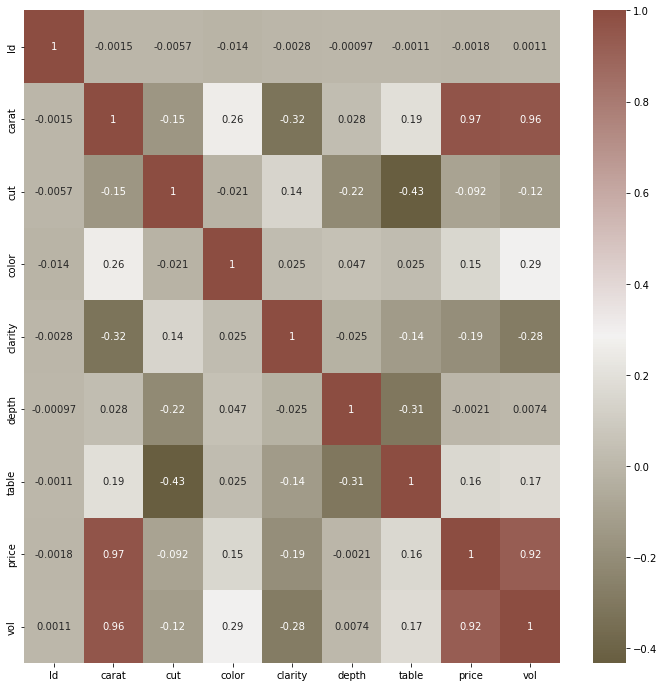

In [42]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

There is strong positive relationship between caratand and price, vol and price, vol and carat

# Model Building

In [43]:
X=train.drop('price',axis=1)
y=train['price']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [45]:
pred = pipeline_lr.predict(X_test)

print(type (pred))
print(len(pred))

NameError: name 'pipeline_lr' is not defined

In [ ]:
# Linear Regression
linear_regressor=LinearRegression()
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("linear_regressor",linear_regressor)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the Linear Regression is:',(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
# Decision Tree
dt=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("Decision Tree",dt)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the dt is: ',(np.sqrt(mean_squared_error(y_test, y_pred))))

In [47]:
# AdaBoostRegressor
AdaBoost= AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("AdaBoost",AdaBoost)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the AdaBoost is: ',(np.sqrt(mean_squared_error(y_test, y_pred))))

R squared of the Linear Regression is: 94.29%
mean_squared_error of the AdaBoost is:  0.24206559101270855


In [ ]:
# Gradient_Boost
Gradient_Boost=GradientBoostingRegressor(n_estimators=500)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("Gradient_Boost",Gradient_Boost)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the Gradient_Boost is: ',(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
#xgboost
xgboost=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("xgboost",xgboost)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the xgboost is: ',(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
# RandomForestRegressor
Random_Forest=RandomForestRegressor(n_estimators=350,
                                    random_state=3,
                                    max_samples=0.5,
                                    max_features=0.75,
                                    max_depth=15)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("Random_Forest",Random_Forest)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the Random_Forest is: ',(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
# KNeighbors
KNN=KNeighborsRegressor(n_neighbors=30)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("KNN",KNN)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the KNN is:' , (np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
# ExtraTrees
ExtraTrees=ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe=Pipeline([
    ("scalar1",StandardScaler()),
    ("ExtraTrees",ExtraTrees)
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

print('R squared of the Linear Regression is: {:.2%}'.format(pipe.score(X_train, y_train)))
print('mean_squared_error of the ExtraTree is:',(np.sqrt(mean_squared_error(y_test, y_pred))))

In [48]:
from sklearn.ensemble import VotingRegressor
step1 = StandardScaler()


lr=LinearRegression()
dt=DecisionTreeRegressor(max_depth=8)
AdaBoost= AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
Gradient_Boost=GradientBoostingRegressor(n_estimators=500)
xgboost=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
Random_Forest=RandomForestRegressor(n_estimators=350,
                                    random_state=3,
                                    max_samples=0.5,
                                    max_features=0.75,
                                    max_depth=15)
KNN=KNeighborsRegressor(n_neighbors=30)
ExtraTrees=ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)




voting = VotingRegressor([('lr', lr), ('dt', dt),("AdaBoost",AdaBoost) ,('Gradient_Boost',Gradient_Boost), ('xgboost',xgboost),("Random_Forest",Random_Forest),("KNN",KNN),("ExtraTrees",ExtraTrees)],weights=[5,5,1,1,1,1,1,1])

step2=voting
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

voting.fit(X_train,y_train)

pred = voting.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_squared_error(y_test, y_pred))

R2 score 0.94333144951993
MAE 0.05859575035233189


# Exporting The Model

In [ ]:
train.drop(['cut','color','clarity'],axis=1,inplace=True)
test.drop(['cut','color','clarity'],axis=1,inplace=True)

In [ ]:
pred =voting.predict(test.drop('Id',axis=1))
data={'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)

In [ ]:
sub.to_csv('sub.csv',index=False)

In [ ]:
train.drop(['cut','color','clarity'],axis=1,inplace=True)
test.drop(['cut','color','clarity'],axis=1,inplace=True)